# Global Power plant :

In [1]:
# Importing important modules :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore , boxcox
from sklearn.preprocessing import MinMaxScaler , StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Getting all three datasets 

In [2]:
IND = pd.read_csv('database_IND.csv')
IND

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.41461,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,1.92500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,2.05400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
USA = pd.read_csv('database_USA.csv')
USA

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,USA,United States of America,10 Briggs Solar NG LLC (East),USA0062781,0.0,41.6327,-71.4963,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USA,United States of America,100 Brook Hill Drive Solar,USA0063292,2.0,41.0930,-73.9828,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,2.46700,U.S. Energy Information Administration,NaN
2,USA,United States of America,1001 Ebenezer Church Solar,USA0063444,0.0,36.2838,-80.8434,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USA,United States of America,1008 Matthews Solar,USA0063447,0.0,36.2167,-80.5525,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,United States of America,1009 Yadkin Solar,USA0063445,0.0,36.1475,-80.6561,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11874,USA,United States of America,Zotos International WPGF,USA0057648,3.4,42.8869,-76.9683,Wind,NaN,NaN,...,2019.0,3.671,2.46015,2.489,1.670,1.23349,2.630,1.21100,U.S. Energy Information Administration,NaN
11875,USA,United States of America,Zumbro Community Solar Garden,USA0061574,1.0,44.3195,-92.6703,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,1.161,1.58900,U.S. Energy Information Administration,NaN
11876,USA,United States of America,Zumbro Solar Garden,USA0063426,0.0,44.0460,-92.7600,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11877,USA,United States of America,Zuni,USA0000478,0.0,39.7373,-105.0170,NaN,NaN,NaN,...,2019.0,0.000,0.00000,0.000,NaN,NaN,NaN,NaN,U.S. Energy Information Administration,NaN


In [4]:
AUS = pd.read_csv('database_AUS.csv')
AUS

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,AUS,Australia,Yarrawonga,AUS0000101,9.00,-36.0094,145.9995,Hydro,NaN,NaN,...,2019.0,38.216111,44.224722,50.183889,46.035278,31.444722,37.317778,NaN,Australia Clean Energy Regulator,NaN
508,AUS,Australia,Yarwun,AUS0000173,154.00,-23.8306,151.1519,Gas,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,AUS,Australia,Yuendumu,AUS0000465,0.24,-22.2426,131.7931,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,5.216667,5.176944,5.341111,NaN,Australia Clean Energy Regulator,NaN
510,AUS,Australia,Yulara,AUS0000257,10.95,-25.2323,130.9912,Gas,NaN,NaN,...,2019.0,21.947500,22.775000,24.086111,23.043889,19.885000,19.558056,NaN,Australia Clean Energy Regulator,NaN


In [2]:
# Merge all three dataset 

In [5]:
df = pd.concat([IND, USA, AUS])
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.50,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.00,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.20,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.00,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.414610,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.00,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,AUS,Australia,Yarrawonga,AUS0000101,9.00,-36.0094,145.9995,Hydro,NaN,NaN,...,2019.0,38.216111,44.224722,50.183889,46.035278,31.444722,37.317778,NaN,Australia Clean Energy Regulator,NaN
508,AUS,Australia,Yarwun,AUS0000173,154.00,-23.8306,151.1519,Gas,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,AUS,Australia,Yuendumu,AUS0000465,0.24,-22.2426,131.7931,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,5.216667,5.176944,5.341111,NaN,Australia Clean Energy Regulator,NaN
510,AUS,Australia,Yulara,AUS0000257,10.95,-25.2323,130.9912,Gas,NaN,NaN,...,2019.0,21.947500,22.775000,24.086111,23.043889,19.885000,19.558056,NaN,Australia Clean Energy Regulator,NaN


In [6]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

# Working in Primary fuel prediction :

# I want to analyse the fuel's columns first :

In [7]:
df['primary_fuel'].value_counts()

Solar           3480
Gas             2031
Hydro           1783
Wind            1340
Oil              961
Waste            595
Coal             572
Biomass          230
Storage          104
Nuclear           72
Geothermal        65
Cogeneration      34
Other             16
Petcoke           11
Name: primary_fuel, dtype: int64

In [8]:
df['other_fuel1'].value_counts()

Oil             986
Gas             351
Coal             71
Waste            63
Storage          43
Solar            30
Hydro            20
Biomass          19
Other            17
Petcoke          15
Wind              7
Cogeneration      6
Name: other_fuel1, dtype: int64

In [9]:
df['other_fuel2'].value_counts()

Gas        87
Oil        62
Other      32
Waste      31
Biomass    18
Solar      17
Storage     6
Hydro       6
Wind        4
Petcoke     4
Coal        3
Name: other_fuel2, dtype: int64

In [10]:
df['other_fuel3'].value_counts()

Gas        34
Other      20
Biomass    13
Hydro       6
Solar       5
Waste       5
Oil         5
Wind        2
Storage     2
Name: other_fuel3, dtype: int64

In [11]:
fuel_df = df[['primary_fuel','other_fuel1', 'other_fuel2', 'other_fuel3']]
fuel_df

,primary_fuel,other_fuel1,other_fuel2,other_fuel3
0,Solar,NaN,NaN,NaN
1,Coal,NaN,NaN,NaN
2,Wind,NaN,NaN,NaN
3,Gas,NaN,NaN,NaN
4,Coal,Oil,NaN,NaN
...,...,...,...,...
507,Hydro,NaN,NaN,NaN
508,Gas,NaN,NaN,NaN
509,Solar,NaN,NaN,NaN
510,Gas,NaN,NaN,NaN


In [12]:
for fuel_type in fuel_df['primary_fuel'].unique():
  primary_df = fuel_df.loc[fuel_df['primary_fuel'] == fuel_type]
  
  # Get value counts for each 'other_fuel' column
  other_fuel1_counts = primary_df['other_fuel1'].value_counts()
  other_fuel2_counts = primary_df['other_fuel2'].value_counts()
  other_fuel3_counts = primary_df['other_fuel3'].value_counts()
  
  # Print results
  print(f"For primary fuel: {fuel_type}")
  print(f"Total records for {fuel_type}: {len(primary_df)}")
  print(other_fuel1_counts)
  print(other_fuel2_counts)
  print(other_fuel3_counts)
  
  # Calculate and print sum of non-null values in 'other_fuel' counts
  total_other_fuel1 = other_fuel1_counts.sum() if len(other_fuel1_counts) > 0 else 0
  total_other_fuel2 = other_fuel2_counts.sum() if len(other_fuel2_counts) > 0 else 0
  total_other_fuel3 = other_fuel3_counts.sum() if len(other_fuel3_counts) > 0 else 0
  
  print(f"Total occurrences of 'other_fuel1' for {fuel_type}: {total_other_fuel1}")
  print(f"Total occurrences of 'other_fuel2' for {fuel_type}: {total_other_fuel2}")
  print(f"Total occurrences of 'other_fuel3' for {fuel_type}: {total_other_fuel3}")
  print("\n")  # Add a newline for better readability between groups

For primary fuel: Solar
Total records for Solar: 3480
Storage    26
Gas        14
Oil         1
Wind        1
Name: other_fuel1, dtype: int64
Gas    1
Name: other_fuel2, dtype: int64
Storage    1
Name: other_fuel3, dtype: int64
Total occurrences of 'other_fuel1' for Solar: 42
Total occurrences of 'other_fuel2' for Solar: 1
Total occurrences of 'other_fuel3' for Solar: 1


For primary fuel: Coal
Total records for Coal: 572
Oil             276
Gas              58
Waste            18
Petcoke          11
Other             2
Cogeneration      1
Solar             1
Name: other_fuel1, dtype: int64
Gas        42
Oil         9
Other       8
Petcoke     2
Biomass     1
Hydro       1
Solar       1
Waste       1
Name: other_fuel2, dtype: int64
Gas        5
Other      4
Oil        2
Hydro      2
Solar      1
Biomass    1
Name: other_fuel3, dtype: int64
Total occurrences of 'other_fuel1' for Coal: 367
Total occurrences of 'other_fuel2' for Coal: 65
Total occurrences of 'other_fuel3' for Coal: 15


F

In [3]:
# So , I can not blindly delete the other_fuel columns :

In [13]:
# I want to check is there any relation between  'capacity_mw' and 'primary_fuel'

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Solar'),
  Text(1, 0, 'Coal'),
  Text(2, 0, 'Wind'),
  Text(3, 0, 'Gas'),
  Text(4, 0, 'Hydro'),
  Text(5, 0, 'Biomass'),
  Text(6, 0, 'Oil'),
  Text(7, 0, 'Nuclear'),
  Text(8, 0, 'Waste'),
  Text(9, 0, 'Storage'),
  Text(10, 0, 'Cogeneration'),
  Text(11, 0, 'Geothermal'),
  Text(12, 0, 'Petcoke'),
  Text(13, 0, 'Other')])

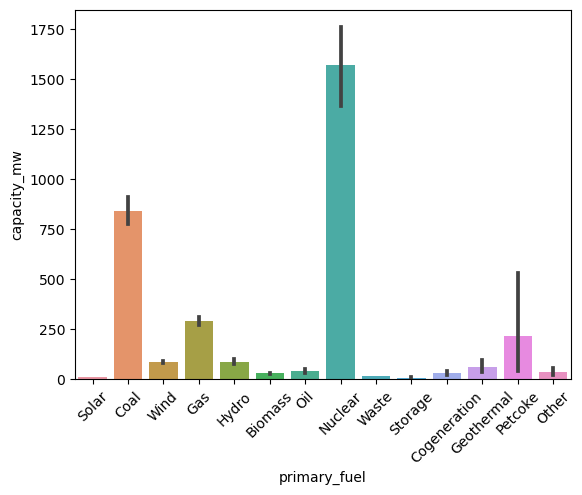

In [14]:
sns.barplot(data = df , x = 'primary_fuel' , y = 'capacity_mw')
plt.xticks(rotation = 45)

In [4]:
# So , neuclear has most capacity mw , then Coal
# Solar and storage has least capacity_mw

In [5]:
# I want to check the relation of capacity_mw with longitude and latitude :

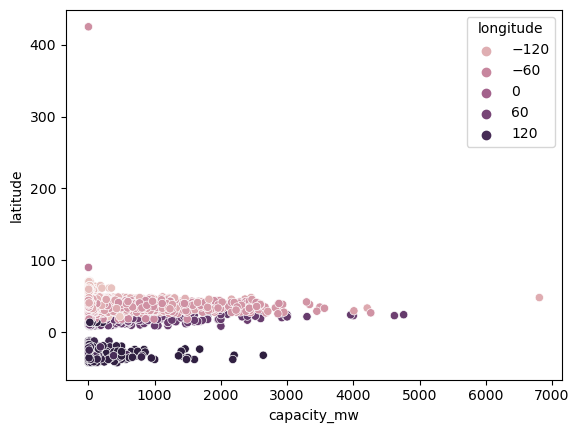

In [15]:
sns.scatterplot(data = df ,  x = 'capacity_mw' , y = 'latitude', hue = 'longitude')
plt.show()

In [6]:
# I want to see the relation of primary_fuel and geolocation source :
#     I want to see which geolocation source has how much of each primary_fuel :

In [17]:
df['geolocation_source'].value_counts()

U.S. Energy Information Administration                11833
WRI                                                     807
Australian Renewable Energy Mapping Infrastructure      512
Industry About                                          119
National Renewable Energy Laboratory                      4
Name: geolocation_source, dtype: int64

In [18]:
df_grouped = df.groupby('geolocation_source')['primary_fuel'].value_counts()
df_grouped

geolocation_source                                  primary_fuel
Australian Renewable Energy Mapping Infrastructure  Gas              140
                                                    Hydro             76
                                                    Wind              76
                                                    Solar             62
                                                    Oil               55
                                                    Waste             50
                                                    Coal              28
                                                    Biomass           25
Industry About                                      Solar            119
National Renewable Energy Laboratory                Solar              4
U.S. Energy Information Administration              Solar           3284
                                                    Gas             1813
                                                    Hydro  

In [19]:
df['year_of_capacity_data'].value_counts()

2019.0    12860
Name: year_of_capacity_data, dtype: int64

In [20]:
# So , till here , I can sayy that the columns country_long , capacity_mw , primary_fuel , other_fuel1 , other_fuel2 , other_fuel3 , commissioning_yer , owner , geolocation_source are most important

In [21]:
unimportant_columns = ['country','name','gppd_idnr','latitude', 'longitude','source','url','wepp_id','year_of_capacity_data']
new_df = df.drop(unimportant_columns , axis = 1)
new_df

,country_long,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,India,2.50,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,India,98.00,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,India,39.20,Wind,NaN,NaN,NaN,NaN,AES,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,India,135.00,Gas,NaN,NaN,NaN,2004.0,NaN,WRI,2.414610,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,India,1800.00,Coal,Oil,NaN,NaN,2015.0,NaN,WRI,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,Australia,9.00,Hydro,NaN,NaN,NaN,NaN,AGL Energy Pty Ltd,Australian Renewable Energy Mapping Infrastruc...,38.216111,44.224722,50.183889,46.035278,31.444722,37.317778,NaN,Australia Clean Energy Regulator,NaN
508,Australia,154.00,Gas,NaN,NaN,NaN,NaN,Rio Tinto Australia - Yarwun Pty Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,Australia,0.24,Solar,NaN,NaN,NaN,NaN,Power and Water Corporation,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,5.216667,5.176944,5.341111,NaN,Australia Clean Energy Regulator,NaN
510,Australia,10.95,Gas,NaN,NaN,NaN,1990.0,NT Government,Australian Renewable Energy Mapping Infrastruc...,21.947500,22.775000,24.086111,23.043889,19.885000,19.558056,NaN,Australia Clean Energy Regulator,NaN


In [7]:
# Here , I have remove the unimportant columns and taking the important columns 

In [ ]:
# Now I want to see the relation of primary_fuel with the columns 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
# 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
# 'generation_gwh_2019', 'generation_data_source',
# 'estimated_generation_gwh' 

In [23]:
n_df = new_df.iloc[:,9:]

In [24]:
n_df['primary_fuel'] = new_df['primary_fuel']
n_df

,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh,primary_fuel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Solar
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coal
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wind
3,2.414610,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN,Gas
4,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN,Coal
...,...,...,...,...,...,...,...,...,...,...
507,38.216111,44.224722,50.183889,46.035278,31.444722,37.317778,NaN,Australia Clean Energy Regulator,NaN,Hydro
508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gas
509,NaN,NaN,NaN,5.216667,5.176944,5.341111,NaN,Australia Clean Energy Regulator,NaN,Solar
510,21.947500,22.775000,24.086111,23.043889,19.885000,19.558056,NaN,Australia Clean Energy Regulator,NaN,Gas


In [8]:
# Checking thne relation of'generation_gwh' for given years with 'primary_fuel'

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Solar'),
  Text(1, 0, 'Coal'),
  Text(2, 0, 'Wind'),
  Text(3, 0, 'Gas'),
  Text(4, 0, 'Hydro'),
  Text(5, 0, 'Biomass'),
  Text(6, 0, 'Oil'),
  Text(7, 0, 'Nuclear'),
  Text(8, 0, 'Waste'),
  Text(9, 0, 'Storage'),
  Text(10, 0, 'Cogeneration'),
  Text(11, 0, 'Geothermal'),
  Text(12, 0, 'Petcoke'),
  Text(13, 0, 'Other')])

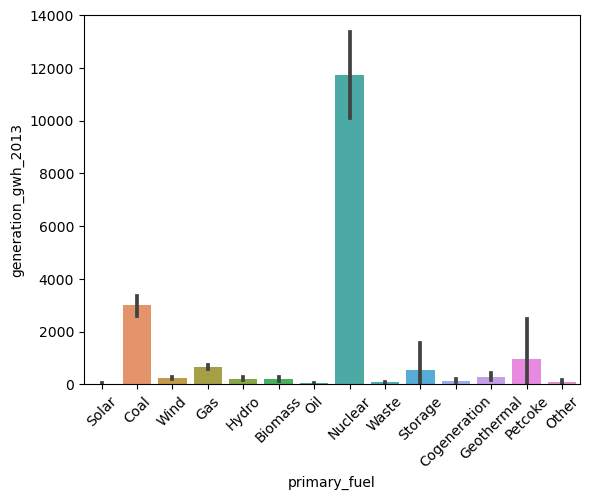

In [26]:
sns.barplot(data = n_df , x = 'primary_fuel' , y = 'generation_gwh_2013')
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Solar'),
  Text(1, 0, 'Coal'),
  Text(2, 0, 'Wind'),
  Text(3, 0, 'Gas'),
  Text(4, 0, 'Hydro'),
  Text(5, 0, 'Biomass'),
  Text(6, 0, 'Oil'),
  Text(7, 0, 'Nuclear'),
  Text(8, 0, 'Waste'),
  Text(9, 0, 'Storage'),
  Text(10, 0, 'Cogeneration'),
  Text(11, 0, 'Geothermal'),
  Text(12, 0, 'Petcoke'),
  Text(13, 0, 'Other')])

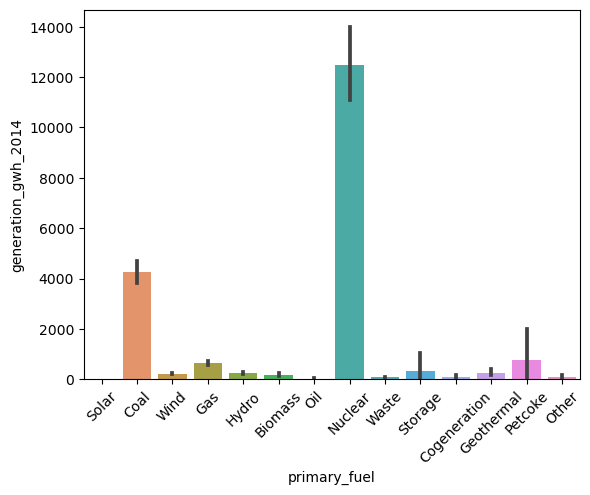

In [27]:
sns.barplot(data = n_df , x = 'primary_fuel' , y = 'generation_gwh_2014')
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Solar'),
  Text(1, 0, 'Coal'),
  Text(2, 0, 'Wind'),
  Text(3, 0, 'Gas'),
  Text(4, 0, 'Hydro'),
  Text(5, 0, 'Biomass'),
  Text(6, 0, 'Oil'),
  Text(7, 0, 'Nuclear'),
  Text(8, 0, 'Waste'),
  Text(9, 0, 'Storage'),
  Text(10, 0, 'Cogeneration'),
  Text(11, 0, 'Geothermal'),
  Text(12, 0, 'Petcoke'),
  Text(13, 0, 'Other')])

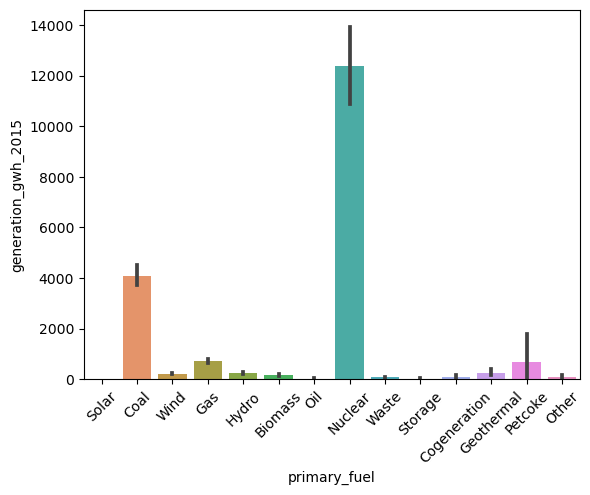

In [28]:
sns.barplot(data = n_df , x = 'primary_fuel' , y = 'generation_gwh_2015')
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Solar'),
  Text(1, 0, 'Coal'),
  Text(2, 0, 'Wind'),
  Text(3, 0, 'Gas'),
  Text(4, 0, 'Hydro'),
  Text(5, 0, 'Biomass'),
  Text(6, 0, 'Oil'),
  Text(7, 0, 'Nuclear'),
  Text(8, 0, 'Waste'),
  Text(9, 0, 'Storage'),
  Text(10, 0, 'Cogeneration'),
  Text(11, 0, 'Geothermal'),
  Text(12, 0, 'Petcoke'),
  Text(13, 0, 'Other')])

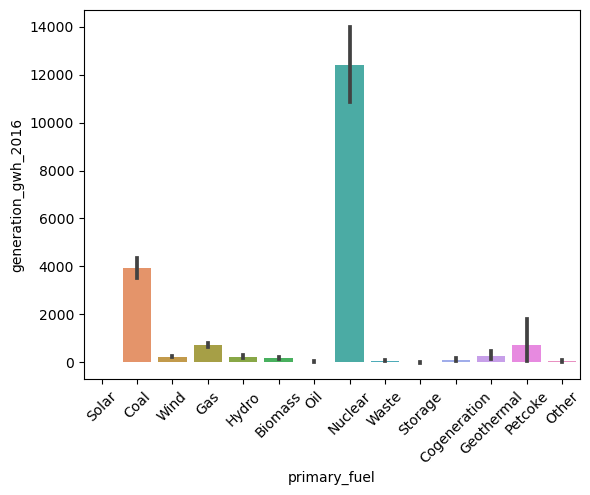

In [29]:
sns.barplot(data = n_df , x = 'primary_fuel' , y = 'generation_gwh_2016')
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Solar'),
  Text(1, 0, 'Coal'),
  Text(2, 0, 'Wind'),
  Text(3, 0, 'Gas'),
  Text(4, 0, 'Hydro'),
  Text(5, 0, 'Biomass'),
  Text(6, 0, 'Oil'),
  Text(7, 0, 'Nuclear'),
  Text(8, 0, 'Waste'),
  Text(9, 0, 'Storage'),
  Text(10, 0, 'Cogeneration'),
  Text(11, 0, 'Geothermal'),
  Text(12, 0, 'Petcoke'),
  Text(13, 0, 'Other')])

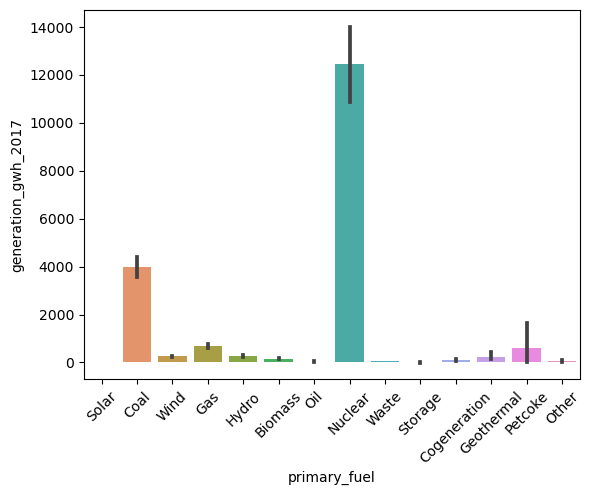

In [30]:
sns.barplot(data = n_df , x = 'primary_fuel' , y = 'generation_gwh_2017')
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Solar'),
  Text(1, 0, 'Coal'),
  Text(2, 0, 'Wind'),
  Text(3, 0, 'Gas'),
  Text(4, 0, 'Hydro'),
  Text(5, 0, 'Biomass'),
  Text(6, 0, 'Oil'),
  Text(7, 0, 'Nuclear'),
  Text(8, 0, 'Waste'),
  Text(9, 0, 'Storage'),
  Text(10, 0, 'Cogeneration'),
  Text(11, 0, 'Geothermal'),
  Text(12, 0, 'Petcoke'),
  Text(13, 0, 'Other')])

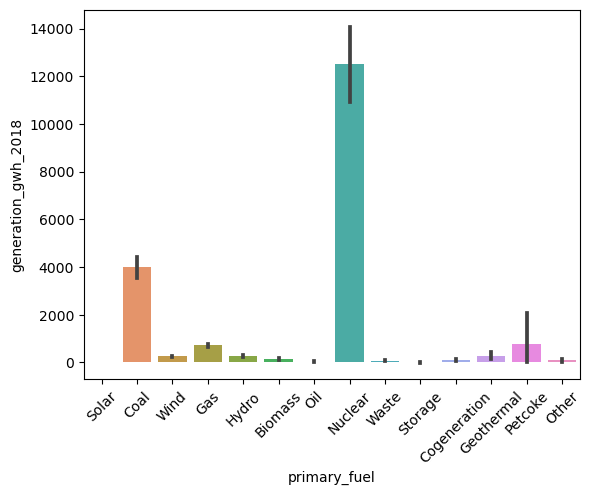

In [31]:
sns.barplot(data = n_df , x = 'primary_fuel' , y = 'generation_gwh_2018')
plt.xticks(rotation = 45)

In [9]:
# So , The growth of neuclear is highest in all  the years , then Coal

In [10]:
# I want to see the relation of primary_fuel and generation_data_source :
#     I want to see which generation_data_source has how much of each primary_fuel :

In [32]:
df_grouped = df.groupby('generation_data_source')['primary_fuel'].value_counts()
df_grouped

generation_data_source                  primary_fuel
Australia Clean Energy Regulator        Gas               94
                                        Hydro             56
                                        Wind              51
                                        Waste             36
                                        Oil               28
                                        Coal              21
                                        Solar             20
                                        Biomass            6
Central Electricity Authority           Coal             189
                                        Hydro            183
                                        Gas               58
                                        Oil               11
                                        Nuclear            8
                                        Solar              2
                                        Wind               2
                                

In [34]:
# from here , I will keep the columns 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'

In [35]:
unimportant_columns = ['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2019','estimated_generation_gwh', 'owner']
new_df = new_df.drop(unimportant_columns, axis = 1)

In [36]:
new_df

,country_long,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,geolocation_source,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,India,2.50,Solar,NaN,NaN,NaN,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN
1,India,98.00,Coal,NaN,NaN,NaN,NaN,WRI,NaN,NaN,NaN,NaN
2,India,39.20,Wind,NaN,NaN,NaN,NaN,WRI,NaN,NaN,NaN,NaN
3,India,135.00,Gas,NaN,NaN,NaN,2004.0,WRI,886.004428,663.774500,626.239128,Central Electricity Authority
4,India,1800.00,Coal,Oil,NaN,NaN,2015.0,WRI,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...
507,Australia,9.00,Hydro,NaN,NaN,NaN,NaN,Australian Renewable Energy Mapping Infrastruc...,46.035278,31.444722,37.317778,Australia Clean Energy Regulator
508,Australia,154.00,Gas,NaN,NaN,NaN,NaN,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,NaN
509,Australia,0.24,Solar,NaN,NaN,NaN,NaN,Australian Renewable Energy Mapping Infrastruc...,5.216667,5.176944,5.341111,Australia Clean Energy Regulator
510,Australia,10.95,Gas,NaN,NaN,NaN,1990.0,Australian Renewable Energy Mapping Infrastruc...,23.043889,19.885000,19.558056,Australia Clean Energy Regulator


In [37]:
new_df.isnull().sum()

country_long                  0
capacity_mw                   6
primary_fuel               2004
other_fuel1               11670
other_fuel2               13028
other_fuel3               13206
commissioning_year         2644
geolocation_source           23
generation_gwh_2016        4597
generation_gwh_2017        4006
generation_gwh_2018        3440
generation_data_source     2463
dtype: int64

# Modifying the columns :

#     primary fuel :

In [11]:
# I will delete those rows where primary_fuel value is null :

In [38]:
New_df = new_df.dropna(subset=['primary_fuel'])
New_df

,country_long,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,geolocation_source,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,India,2.50,Solar,NaN,NaN,NaN,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN
1,India,98.00,Coal,NaN,NaN,NaN,NaN,WRI,NaN,NaN,NaN,NaN
2,India,39.20,Wind,NaN,NaN,NaN,NaN,WRI,NaN,NaN,NaN,NaN
3,India,135.00,Gas,NaN,NaN,NaN,2004.0,WRI,886.004428,663.774500,626.239128,Central Electricity Authority
4,India,1800.00,Coal,Oil,NaN,NaN,2015.0,WRI,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...
507,Australia,9.00,Hydro,NaN,NaN,NaN,NaN,Australian Renewable Energy Mapping Infrastruc...,46.035278,31.444722,37.317778,Australia Clean Energy Regulator
508,Australia,154.00,Gas,NaN,NaN,NaN,NaN,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,NaN
509,Australia,0.24,Solar,NaN,NaN,NaN,NaN,Australian Renewable Energy Mapping Infrastruc...,5.216667,5.176944,5.341111,Australia Clean Energy Regulator
510,Australia,10.95,Gas,NaN,NaN,NaN,1990.0,Australian Renewable Energy Mapping Infrastruc...,23.043889,19.885000,19.558056,Australia Clean Energy Regulator


# Capacity_mw

In [12]:
# I will replace the null values of capacity_mw' with median values of it :

In [39]:
New_df['capacity_mw'] = New_df['capacity_mw'].fillna(New_df['capacity_mw'].median())

In [40]:
New_df.isnull().sum()

country_long                  0
capacity_mw                   0
primary_fuel                  0
other_fuel1                9666
other_fuel2               11024
other_fuel3               11202
commissioning_year          640
geolocation_source           23
generation_gwh_2016        2796
generation_gwh_2017        2173
generation_gwh_2018        1583
generation_data_source      796
dtype: int64

# 'other_fuel1', 'other_fuel2', 'other_fuel3'

In [13]:
# I will replace the null values of other_fuel1 , other_fuel2 and other_fuel3 with 'No', because , 
# there is a chance that , in most of the power plants ,the No other fuels needed .

In [41]:
for col in ['other_fuel1', 'other_fuel2', 'other_fuel3']:
    New_df.loc[New_df[col].isna(), col] = 'No'

In [42]:
New_df

,country_long,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,geolocation_source,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,India,2.50,Solar,No,No,No,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN
1,India,98.00,Coal,No,No,No,NaN,WRI,NaN,NaN,NaN,NaN
2,India,39.20,Wind,No,No,No,NaN,WRI,NaN,NaN,NaN,NaN
3,India,135.00,Gas,No,No,No,2004.0,WRI,886.004428,663.774500,626.239128,Central Electricity Authority
4,India,1800.00,Coal,Oil,No,No,2015.0,WRI,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...
507,Australia,9.00,Hydro,No,No,No,NaN,Australian Renewable Energy Mapping Infrastruc...,46.035278,31.444722,37.317778,Australia Clean Energy Regulator
508,Australia,154.00,Gas,No,No,No,NaN,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,NaN
509,Australia,0.24,Solar,No,No,No,NaN,Australian Renewable Energy Mapping Infrastruc...,5.216667,5.176944,5.341111,Australia Clean Energy Regulator
510,Australia,10.95,Gas,No,No,No,1990.0,Australian Renewable Energy Mapping Infrastruc...,23.043889,19.885000,19.558056,Australia Clean Energy Regulator


# 'commissioning_year'

In [14]:
# I will replace the null values of 'commision_year' with mode of it  

In [43]:
New_df['commissioning_year'] = New_df['commissioning_year'].fillna(New_df['commissioning_year'].mode()[0]).astype(int)

In [44]:
New_df

,country_long,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,geolocation_source,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,India,2.50,Solar,No,No,No,2011,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN
1,India,98.00,Coal,No,No,No,2017,WRI,NaN,NaN,NaN,NaN
2,India,39.20,Wind,No,No,No,2017,WRI,NaN,NaN,NaN,NaN
3,India,135.00,Gas,No,No,No,2004,WRI,886.004428,663.774500,626.239128,Central Electricity Authority
4,India,1800.00,Coal,Oil,No,No,2015,WRI,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...
507,Australia,9.00,Hydro,No,No,No,2017,Australian Renewable Energy Mapping Infrastruc...,46.035278,31.444722,37.317778,Australia Clean Energy Regulator
508,Australia,154.00,Gas,No,No,No,2017,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,NaN
509,Australia,0.24,Solar,No,No,No,2017,Australian Renewable Energy Mapping Infrastruc...,5.216667,5.176944,5.341111,Australia Clean Energy Regulator
510,Australia,10.95,Gas,No,No,No,1990,Australian Renewable Energy Mapping Infrastruc...,23.043889,19.885000,19.558056,Australia Clean Energy Regulator


# geolocation_source

In [45]:
New_df['geolocation_source'].value_counts()

U.S. Energy Information Administration                9829
WRI                                                    807
Australian Renewable Energy Mapping Infrastructure     512
Industry About                                         119
National Renewable Energy Laboratory                     4
Name: geolocation_source, dtype: int64

In [15]:
# I will replace the null values of 'geolocation_source' with mode of it 

In [46]:
New_df['geolocation_source'] = New_df['geolocation_source'].fillna(New_df['geolocation_source'].mode()[0])

In [47]:
New_df.isnull().sum()

country_long                 0
capacity_mw                  0
primary_fuel                 0
other_fuel1                  0
other_fuel2                  0
other_fuel3                  0
commissioning_year           0
geolocation_source           0
generation_gwh_2016       2796
generation_gwh_2017       2173
generation_gwh_2018       1583
generation_data_source     796
dtype: int64

# 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'

In [16]:
# I will replace the null values of 'generation_gwh' with 0 .
# I have tried by replacing with mean and median also but found no effect on the result

In [48]:
for col in ['generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']:
    New_df[col] = New_df[col].fillna(0)

In [49]:
New_df

,country_long,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,geolocation_source,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,India,2.50,Solar,No,No,No,2011,National Renewable Energy Laboratory,0.000000,0.000000,0.000000,NaN
1,India,98.00,Coal,No,No,No,2017,WRI,0.000000,0.000000,0.000000,NaN
2,India,39.20,Wind,No,No,No,2017,WRI,0.000000,0.000000,0.000000,NaN
3,India,135.00,Gas,No,No,No,2004,WRI,886.004428,663.774500,626.239128,Central Electricity Authority
4,India,1800.00,Coal,Oil,No,No,2015,WRI,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...
507,Australia,9.00,Hydro,No,No,No,2017,Australian Renewable Energy Mapping Infrastruc...,46.035278,31.444722,37.317778,Australia Clean Energy Regulator
508,Australia,154.00,Gas,No,No,No,2017,Australian Renewable Energy Mapping Infrastruc...,0.000000,0.000000,0.000000,NaN
509,Australia,0.24,Solar,No,No,No,2017,Australian Renewable Energy Mapping Infrastruc...,5.216667,5.176944,5.341111,Australia Clean Energy Regulator
510,Australia,10.95,Gas,No,No,No,1990,Australian Renewable Energy Mapping Infrastruc...,23.043889,19.885000,19.558056,Australia Clean Energy Regulator


# generation_data_source

In [50]:
New_df['generation_data_source'].value_counts()

U.S. Energy Information Administration    9732
Central Electricity Authority              454
Australia Clean Energy Regulator           312
Name: generation_data_source, dtype: int64

In [17]:
# I will replace the the null values of generation_data_source with mode :

In [51]:
New_df['generation_data_source'] = New_df['generation_data_source'].fillna(New_df['generation_data_source'].mode()[0])

In [52]:
New_df

,country_long,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,geolocation_source,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,India,2.50,Solar,No,No,No,2011,National Renewable Energy Laboratory,0.000000,0.000000,0.000000,U.S. Energy Information Administration
1,India,98.00,Coal,No,No,No,2017,WRI,0.000000,0.000000,0.000000,U.S. Energy Information Administration
2,India,39.20,Wind,No,No,No,2017,WRI,0.000000,0.000000,0.000000,U.S. Energy Information Administration
3,India,135.00,Gas,No,No,No,2004,WRI,886.004428,663.774500,626.239128,Central Electricity Authority
4,India,1800.00,Coal,Oil,No,No,2015,WRI,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...
507,Australia,9.00,Hydro,No,No,No,2017,Australian Renewable Energy Mapping Infrastruc...,46.035278,31.444722,37.317778,Australia Clean Energy Regulator
508,Australia,154.00,Gas,No,No,No,2017,Australian Renewable Energy Mapping Infrastruc...,0.000000,0.000000,0.000000,U.S. Energy Information Administration
509,Australia,0.24,Solar,No,No,No,2017,Australian Renewable Energy Mapping Infrastruc...,5.216667,5.176944,5.341111,Australia Clean Energy Regulator
510,Australia,10.95,Gas,No,No,No,1990,Australian Renewable Energy Mapping Infrastruc...,23.043889,19.885000,19.558056,Australia Clean Energy Regulator


In [53]:
New_df.isnull().sum()

country_long              0
capacity_mw               0
primary_fuel              0
other_fuel1               0
other_fuel2               0
other_fuel3               0
commissioning_year        0
geolocation_source        0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

In [54]:
New_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11294 entries, 0 to 511
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country_long            11294 non-null  object 
 1   capacity_mw             11294 non-null  float64
 2   primary_fuel            11294 non-null  object 
 3   other_fuel1             11294 non-null  object 
 4   other_fuel2             11294 non-null  object 
 5   other_fuel3             11294 non-null  object 
 6   commissioning_year      11294 non-null  int32  
 7   geolocation_source      11294 non-null  object 
 8   generation_gwh_2016     11294 non-null  float64
 9   generation_gwh_2017     11294 non-null  float64
 10  generation_gwh_2018     11294 non-null  float64
 11  generation_data_source  11294 non-null  object 
dtypes: float64(4), int32(1), object(7)
memory usage: 1.1+ MB


In [18]:
# I will delete all the duplicated values now :

In [55]:
New_df.duplicated().sum()

675

In [56]:
New_df = New_df.drop_duplicates()

In [57]:
New_df

,country_long,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,geolocation_source,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,India,2.50,Solar,No,No,No,2011,National Renewable Energy Laboratory,0.000000,0.000000,0.000000,U.S. Energy Information Administration
1,India,98.00,Coal,No,No,No,2017,WRI,0.000000,0.000000,0.000000,U.S. Energy Information Administration
2,India,39.20,Wind,No,No,No,2017,WRI,0.000000,0.000000,0.000000,U.S. Energy Information Administration
3,India,135.00,Gas,No,No,No,2004,WRI,886.004428,663.774500,626.239128,Central Electricity Authority
4,India,1800.00,Coal,Oil,No,No,2015,WRI,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...
507,Australia,9.00,Hydro,No,No,No,2017,Australian Renewable Energy Mapping Infrastruc...,46.035278,31.444722,37.317778,Australia Clean Energy Regulator
508,Australia,154.00,Gas,No,No,No,2017,Australian Renewable Energy Mapping Infrastruc...,0.000000,0.000000,0.000000,U.S. Energy Information Administration
509,Australia,0.24,Solar,No,No,No,2017,Australian Renewable Energy Mapping Infrastruc...,5.216667,5.176944,5.341111,Australia Clean Energy Regulator
510,Australia,10.95,Gas,No,No,No,1990,Australian Renewable Energy Mapping Infrastruc...,23.043889,19.885000,19.558056,Australia Clean Energy Regulator


# Column Transformation :

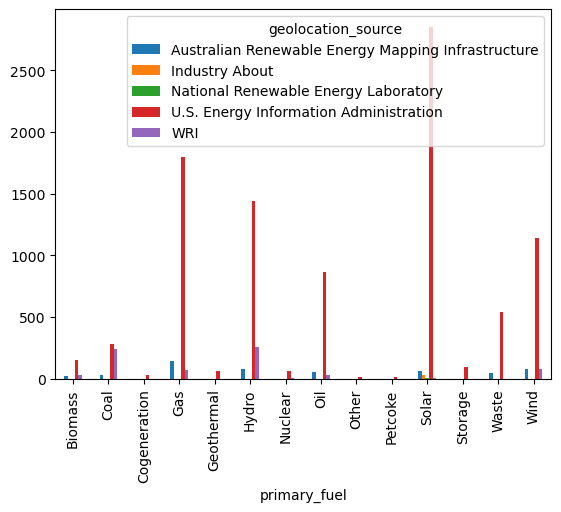

In [58]:
crosstab = pd.crosstab(New_df['primary_fuel'] , New_df['geolocation_source'])
crosstab.plot(kind = 'bar')
plt.show()

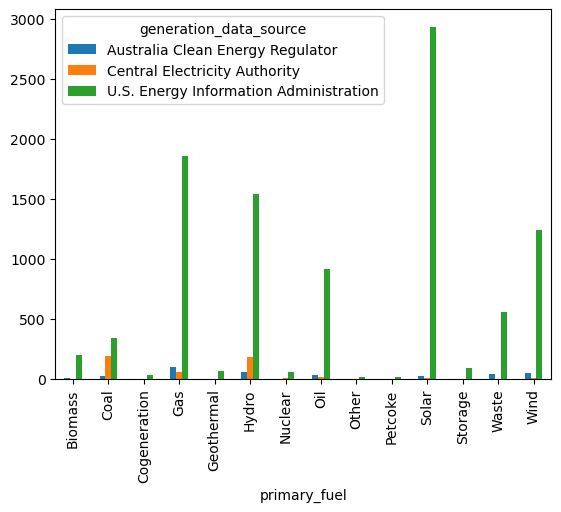

In [59]:
crosstab = pd.crosstab(New_df['primary_fuel'] , New_df['generation_data_source'])
crosstab.plot(kind = 'bar')
plt.show()

In [19]:
# I will replace the values of primary_fuel with numerical values using mapping :

In [60]:
New_df['primary_fuel'].value_counts()

Solar           2956
Gas             2010
Hydro           1778
Wind            1296
Oil              950
Waste            590
Coal             550
Biomass          204
Storage           91
Nuclear           68
Geothermal        65
Cogeneration      34
Other             16
Petcoke           11
Name: primary_fuel, dtype: int64

In [61]:
fuel_dict = {
    'Solar' : 1,
    'Gas' : 2,
    'Hydro' : 3,         
    'Wind' : 4,         
    'Oil' : 5,        
    'Waste' : 6,       
    'Coal' : 7,        
    'Biomass' :  8,        
    'Storage' : 9,   
    'Nuclear' : 10,   
    'Geothermal' : 11,       
    'Cogeneration' :  12,        
    'Other' : 13,        
    'Petcoke' : 14   
}

In [62]:
New_df['primary_fuel']  = New_df['primary_fuel'].map(fuel_dict)

In [63]:
New_df.isnull().sum()

country_long              0
capacity_mw               0
primary_fuel              0
other_fuel1               0
other_fuel2               0
other_fuel3               0
commissioning_year        0
geolocation_source        0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

In [20]:
# I will note remove outliers because , I thing tree and ensemble models can perform better in this dataset
# For other categorical columns , I will chose OneHotEncoding 

# Spliting the data :

In [64]:
X = New_df.drop('primary_fuel', axis =1)
X

,country_long,capacity_mw,other_fuel1,other_fuel2,other_fuel3,commissioning_year,geolocation_source,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,India,2.50,No,No,No,2011,National Renewable Energy Laboratory,0.000000,0.000000,0.000000,U.S. Energy Information Administration
1,India,98.00,No,No,No,2017,WRI,0.000000,0.000000,0.000000,U.S. Energy Information Administration
2,India,39.20,No,No,No,2017,WRI,0.000000,0.000000,0.000000,U.S. Energy Information Administration
3,India,135.00,No,No,No,2004,WRI,886.004428,663.774500,626.239128,Central Electricity Authority
4,India,1800.00,Oil,No,No,2015,WRI,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...
507,Australia,9.00,No,No,No,2017,Australian Renewable Energy Mapping Infrastruc...,46.035278,31.444722,37.317778,Australia Clean Energy Regulator
508,Australia,154.00,No,No,No,2017,Australian Renewable Energy Mapping Infrastruc...,0.000000,0.000000,0.000000,U.S. Energy Information Administration
509,Australia,0.24,No,No,No,2017,Australian Renewable Energy Mapping Infrastruc...,5.216667,5.176944,5.341111,Australia Clean Energy Regulator
510,Australia,10.95,No,No,No,1990,Australian Renewable Energy Mapping Infrastruc...,23.043889,19.885000,19.558056,Australia Clean Energy Regulator


In [65]:
y = New_df['primary_fuel']
y

0      1
1      7
2      4
3      2
4      7
      ..
507    3
508    2
509    1
510    2
511    2
Name: primary_fuel, Length: 10619, dtype: int64

# Data Preprocessing :

In [148]:
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import  ColumnTransformer

In [43]:
ohe = OneHotEncoder(drop = 'first',handle_unknown='ignore')
scaler = StandardScaler()

In [68]:
X.head(5)

,country_long,capacity_mw,other_fuel1,other_fuel2,other_fuel3,commissioning_year,geolocation_source,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,India,2.5,No,No,No,2011,National Renewable Energy Laboratory,0.000000,0.000000,0.000000,U.S. Energy Information Administration
1,India,98.0,No,No,No,2017,WRI,0.000000,0.000000,0.000000,U.S. Energy Information Administration
2,India,39.2,No,No,No,2017,WRI,0.000000,0.000000,0.000000,U.S. Energy Information Administration
3,India,135.0,No,No,No,2004,WRI,886.004428,663.774500,626.239128,Central Electricity Authority
4,India,1800.0,Oil,No,No,2015,WRI,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [70]:
preprocessor = ColumnTransformer(
transformers = [
    ('onehotencoder', ohe ,[0,2,3,4,6,10] ),
    ('standerdization' , scaler , [1,5,7,8,9])
],
remainder = 'passthrough'
)

# Importing Important algorithms and functions :

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Using LogisticRegression :

In [88]:
lg_score = []
for i  in range(100):
    X_train , X_test , y_train  , y_test = train_test_split(X,y,test_size = 0.2 , random_state = i)
    lg = LogisticRegression(C = 100)
    X_train_dummy = preprocessor.fit_transform(X_train)
    X_test_dummy = preprocessor.transform(X_test)
    lg.fit(X_train_dummy , y_train)
    y_pred = lg.predict(X_test_dummy)
    lg_score.append(accuracy_score(y_test , y_pred))

In [89]:
lg_score[np.argmax(lg_score)]

0.6807909604519774

# Using KNeighborsClassifier :

In [103]:
knn_score = []
for i  in range(50):
    X_train , X_test , y_train  , y_test = train_test_split(X,y,test_size = 0.2 , random_state = i)
    knn = KNeighborsClassifier(n_neighbors = 8)
    X_train_dummy = preprocessor.fit_transform(X_train)
    X_test_dummy = preprocessor.transform(X_test)
    knn.fit(X_train_dummy , y_train)
    y_pred = knn.predict(X_test_dummy)
    knn_score.append(accuracy_score(y_test , y_pred))

In [118]:
print('highest value :' ,knn_score[np.argmax(knn_score)])
print('best random_state :',np.argmax(knn_score) )

highest value : 0.7542372881355932
best random_state : 33


In [117]:
X_train , X_test , y_train  , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 33)
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.transform(X_test)

param_grid = {
    'n_neighbors': [5, 7, 9 , 10],
    'weights': ['uniform','distance'],
}

grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_dummy, y_train)

y_pred_R = grid_search.best_estimator_.predict(X_test_dummy)

print('accuracy :',accuracy_score(y_test , y_pred_R))
print('best parameters :',grid_search.best_params_)

accuracy : 0.7603578154425612
best parameters : {'n_neighbors': 7, 'weights': 'distance'}


# Using RandomForestClassifier :

In [98]:
rf_score = []
for i  in range(100):
    X_train , X_test , y_train  , y_test = train_test_split(X,y,test_size = 0.2 , random_state = i)
    rf = RandomForestClassifier(n_estimators= 100 , max_depth = 10)
    X_train_dummy = preprocessor.fit_transform(X_train)
    X_test_dummy = preprocessor.transform(X_test)
    rf.fit(X_train_dummy , y_train)
    y_pred = rf.predict(X_test_dummy)
    rf_score.append(accuracy_score(y_test , y_pred))

In [119]:
print('highest value :' ,rf_score[np.argmax(rf_score)])
print('best random_state :',np.argmax(rf_score) )

highest value : 0.7693032015065914
best random_state : 92


In [112]:
X_train , X_test , y_train  , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 92)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 500 , max_depth = 15)
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.transform(X_test)
rf.fit(X_train_dummy , y_train)
y_pred = rf.predict(X_test_dummy)
print(accuracy_score(y_test , y_pred))

0.8055555555555556


# Using GradientBoostingClassifier :

In [110]:
X_train , X_test , y_train  , y_test = train_test_split(X,y,test_size = 0.3 , random_state = 92)
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators= 100 , max_depth = 1)
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.transform(X_test)
gb.fit(X_train_dummy , y_train)
y_pred = gb.predict(X_test_dummy)
print(accuracy_score(y_test , y_pred))

0.7222222222222222


In [21]:
# I can use GridSearchCV in the models but the machine takes too much of time here . I apologise for that 

# Using StackingClassifier :

In [74]:
from  sklearn.ensemble import StackingClassifier

In [75]:
stacking_clf = StackingClassifier(
   estimators = [
       ('lr', LogisticRegression()),
       ('knn', KNeighborsClassifier(n_neighbors = 7 , weights = 'distance')),
       ('rfr', RandomForestClassifier(n_estimators=500,  max_depth= 15)),
       ('gbr',GradientBoostingClassifier( n_estimators=100, max_depth=1))
   ],
   final_estimator = RandomForestClassifier(n_estimators=500,  max_depth= 10 ),
   cv = 5
)


In [76]:
X_train , X_test , y_train  , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 92)
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.transform(X_test)
c.fit(X_train_dummy , y_train)
stacking_pred = stacking_clf.predict(X_test_dummy)
accuracy = accuracy_score(y_test, stacking_pred)
print("accuracy_score of stacking Classifier :", accuracy)

accuracy_score of stacking Classifier : 0.8121468926553672


# So , I will chose StackingClassifier here :

# Prediction Model :

In [85]:
def prediction(country_long,	capacity_mw,	other_fuel1,	other_fuel2,	other_fuel3,	commissioning_year,	geolocation_source,	generation_gwh_2016,	generation_gwh_2017,	generation_gwh_2018,	generation_data_source):
    features = np.array([[country_long,	capacity_mw,	other_fuel1,	other_fuel2,	other_fuel3,	commissioning_year,	geolocation_source,	generation_gwh_2016,	generation_gwh_2017,	generation_gwh_2018,	generation_data_source]])
    
    transformed_features = preprocessor.transform(features)
    predict_value = stacking_clf.predict(transformed_features).reshape(1,-1)
    return predict_value[0]

In [89]:
country_long = 'United States of America'	
capacity_mw= 114.0 	
other_fuel1 = 'No'	
other_fuel2 = 'No'	
other_fuel3 = 'No'	
commissioning_year = 2002	
geolocation_source = 'U.S. Energy Information Administration' 
generation_gwh_2016 = 8.028000	
generation_gwh_2017 = 6.271000	
generation_gwh_2018 = 6.672000	
generation_data_source = 'U.S. Energy Information Administration' 

fuel_predict = prediction(country_long,	capacity_mw,	other_fuel1,	other_fuel2,	other_fuel3,	commissioning_year,	geolocation_source,	generation_gwh_2016,	generation_gwh_2017,	generation_gwh_2018,	generation_data_source)

fuel_dict = {
    
    1 :'Solar',
    2 :'Gas',
    3 :'Hydro',         
    4 :'Wind',         
    5 :'Oil',        
    6 :'Waste',       
    7 :'Coal',        
    8 :'Biomass',        
    9 :'Storage',   
    10 :'Neuclear',   
    11 :'Geothermal',       
    12 :'Cogeneration',        
    13 :'Other',        
    14 :'Petcock'     
}
    

if fuel_predict[0] in fuel_dict :
    fuel = fuel_dict[fuel_predict[0]]
    print("{} is the the primary fuel".format(fuel))
else :
    print("We are not able to find the primary fuel")

Gas is the the primary fuel


In [88]:
New_df.sample(5)

,country_long,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,geolocation_source,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
8451,United States of America,5.0,1,No,No,No,2012,U.S. Energy Information Administration,12.110,11.158,11.786,U.S. Energy Information Administration
7994,United States of America,824.1,2,No,No,No,2001,U.S. Energy Information Administration,2812.676,1763.373,3827.526,U.S. Energy Information Administration
7767,United States of America,8.3,4,No,No,No,2009,U.S. Energy Information Administration,17.759,16.048,20.724,U.S. Energy Information Administration
1512,United States of America,1.4,2,No,No,No,2012,U.S. Energy Information Administration,7.496,9.196,11.286,U.S. Energy Information Administration
7255,United States of America,9.9,1,No,No,No,2017,U.S. Energy Information Administration,0.000,0.000,21.659,U.S. Energy Information Administration


# Working on Capacity_mw prediction :

In [69]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.50,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.00,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.20,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.00,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.414610,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.00,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,AUS,Australia,Yarrawonga,AUS0000101,9.00,-36.0094,145.9995,Hydro,NaN,NaN,...,2019.0,38.216111,44.224722,50.183889,46.035278,31.444722,37.317778,NaN,Australia Clean Energy Regulator,NaN
508,AUS,Australia,Yarwun,AUS0000173,154.00,-23.8306,151.1519,Gas,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,AUS,Australia,Yuendumu,AUS0000465,0.24,-22.2426,131.7931,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,5.216667,5.176944,5.341111,NaN,Australia Clean Energy Regulator,NaN
510,AUS,Australia,Yulara,AUS0000257,10.95,-25.2323,130.9912,Gas,NaN,NaN,...,2019.0,21.947500,22.775000,24.086111,23.043889,19.885000,19.558056,NaN,Australia Clean Energy Regulator,NaN


In [70]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [71]:
# Checking the correlation
df.corr()

,capacity_mw,latitude,longitude,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,estimated_generation_gwh
capacity_mw,1.000000,-0.081193,0.127826,-0.075010,NaN,NaN,0.711180,0.814716,0.827439,0.823751,0.820414,0.826853,NaN
latitude,-0.081193,1.000000,-0.775317,-0.036270,NaN,NaN,-0.046186,-0.084652,-0.085761,-0.091660,-0.098268,-0.099210,NaN
longitude,0.127826,-0.775317,1.000000,-0.002454,NaN,NaN,0.021610,0.148005,0.152223,0.159909,0.171049,0.174741,NaN
commissioning_year,-0.075010,-0.036270,-0.002454,1.000000,NaN,NaN,-0.023853,-0.008306,-0.010147,-0.019808,-0.031506,-0.039119,NaN
wepp_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2013,0.711180,-0.046186,0.021610,-0.023853,NaN,NaN,1.000000,0.876767,0.849356,0.819647,0.827191,0.799184,NaN
generation_gwh_2014,0.814716,-0.084652,0.148005,-0.008306,NaN,NaN,0.876767,1.000000,0.969376,0.940412,0.926261,0.923498,NaN
generation_gwh_2015,0.827439,-0.085761,0.152223,-0.010147,NaN,NaN,0.849356,0.969376,1.000000,0.965066,0.945334,0.948701,NaN
generation_gwh_2016,0.823751,-0.091660,0.159909,-0.019808,NaN,NaN,0.819647,0.940412,0.965066,1.000000,0.969411,0.959924,NaN


In [72]:
df.isnull().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     6
latitude                       78
longitude                      78
primary_fuel                 2004
other_fuel1                 11670
other_fuel2                 13028
other_fuel3                 13206
commissioning_year           2644
owner                         593
source                          0
url                             0
geolocation_source             23
wepp_id                     13298
year_of_capacity_data         438
generation_gwh_2013          6128
generation_gwh_2014          5764
generation_gwh_2015          5305
generation_gwh_2016          4597
generation_gwh_2017          4006
generation_gwh_2018          3440
generation_gwh_2019          3520
generation_data_source       2463
estimated_generation_gwh    13298
dtype: int64

In [73]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [22]:
# Checking the correlation of each numerical column with capacity_mw , I will delete all the unimportant columns

In [74]:
unwanted_columns = ['name', 'gppd_idnr','latitude', 'longitude', 'commissioning_year', 'owner', 'source', 'url',
       'wepp_id', 'year_of_capacity_data', 'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh']
n_df = df.drop(unwanted_columns , axis = 1)

In [75]:
n_df

,country,country_long,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,IND,India,2.50,Solar,NaN,NaN,NaN,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,98.00,Coal,NaN,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,39.20,Wind,NaN,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,135.00,Gas,NaN,NaN,NaN,WRI,2.414610,617.789264,843.747000,886.004428,663.774500,626.239128
4,IND,India,1800.00,Coal,Oil,NaN,NaN,WRI,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,AUS,Australia,9.00,Hydro,NaN,NaN,NaN,Australian Renewable Energy Mapping Infrastruc...,38.216111,44.224722,50.183889,46.035278,31.444722,37.317778
508,AUS,Australia,154.00,Gas,NaN,NaN,NaN,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,NaN,NaN,NaN
509,AUS,Australia,0.24,Solar,NaN,NaN,NaN,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,5.216667,5.176944,5.341111
510,AUS,Australia,10.95,Gas,NaN,NaN,NaN,Australian Renewable Energy Mapping Infrastruc...,21.947500,22.775000,24.086111,23.043889,19.885000,19.558056


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'National Renewable Energy Laboratory'),
  Text(1, 0, 'WRI'),
  Text(2, 0, 'Industry About'),
  Text(3, 0, 'U.S. Energy Information Administration'),
  Text(4, 0, 'Australian Renewable Energy Mapping Infrastructure')])

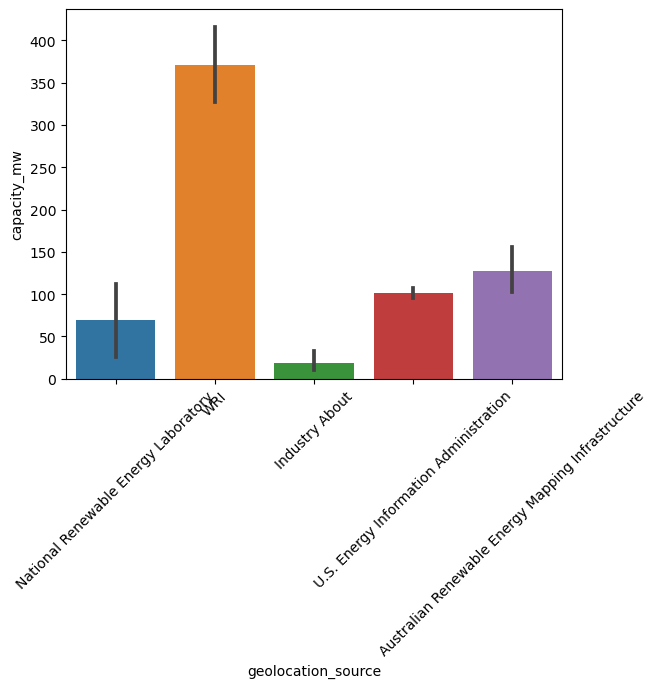

In [76]:
sns.barplot(data = n_df , x = 'geolocation_source' , y = 'capacity_mw')
plt.xticks(rotation = 45)

# column transformation :

In [77]:
n_df.columns

Index(['country', 'country_long', 'capacity_mw', 'primary_fuel', 'other_fuel1',
       'other_fuel2', 'other_fuel3', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [23]:
# I will use mappingfor all the categorical columns because , I found that mapping will give me better result
# and I can not also find any reason for the relation of the categorical columns  with the capacity_mw

In [78]:
country_capacity_avg = n_df.groupby('country')['capacity_mw'].mean()
country_capacity_avg

country
AUS    127.380881
IND    326.223755
USA    101.409492
Name: capacity_mw, dtype: float64

In [79]:
countrylong_capacity_avg = n_df.groupby('country_long')['capacity_mw'].mean()
countrylong_capacity_avg

country_long
Australia                   127.380881
India                       326.223755
United States of America    101.409492
Name: capacity_mw, dtype: float64

In [80]:
country_capacity = {
    'IND' : 10 ,
    'AUS' : 8,
    'USA' : 6
}

countrylong_capacity = {
    'India' : 10 ,
    'Australia' : 8,
    'United States of America' : 6
}


n_df['country'] = n_df['country'].map(country_capacity)
n_df['country_long'] = n_df['country_long'].map(countrylong_capacity)

In [81]:
n_df

,country,country_long,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,10,10,2.50,Solar,NaN,NaN,NaN,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,10,10,98.00,Coal,NaN,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,10,10,39.20,Wind,NaN,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,10,10,135.00,Gas,NaN,NaN,NaN,WRI,2.414610,617.789264,843.747000,886.004428,663.774500,626.239128
4,10,10,1800.00,Coal,Oil,NaN,NaN,WRI,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,8,8,9.00,Hydro,NaN,NaN,NaN,Australian Renewable Energy Mapping Infrastruc...,38.216111,44.224722,50.183889,46.035278,31.444722,37.317778
508,8,8,154.00,Gas,NaN,NaN,NaN,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,NaN,NaN,NaN
509,8,8,0.24,Solar,NaN,NaN,NaN,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,5.216667,5.176944,5.341111
510,8,8,10.95,Gas,NaN,NaN,NaN,Australian Renewable Energy Mapping Infrastruc...,21.947500,22.775000,24.086111,23.043889,19.885000,19.558056


In [24]:
# Here , in the case of primary_fuel , first I will find the mean of capacity_mw for each individual primary_fuel
# and then replace that primary_fuel value with the mean value of it

In [82]:
primary_fuel_avg = n_df.groupby('primary_fuel')['capacity_mw'].mean()
fuel_dict = {key: round(value, 2) for key, value in primary_fuel_avg.to_dict().items()}

# Sort the dictionary by values in descending order
sorted_fuel_dict = dict(sorted(fuel_dict.items(), key=lambda item: item[1], reverse=True))
sorted_fuel_dict

{'Nuclear': 1569.63,
 'Coal': 840.09,
 'Gas': 291.3,
 'Petcoke': 214.69,
 'Hydro': 87.84,
 'Wind': 85.64,
 'Geothermal': 59.83,
 'Oil': 41.71,
 'Other': 35.77,
 'Cogeneration': 30.65,
 'Biomass': 29.2,
 'Waste': 16.73,
 'Solar': 12.48,
 'Storage': 7.84}

In [83]:
n_df['primary_fuel'] = n_df['primary_fuel'].map(sorted_fuel_dict).astype(float)
n_df

,country,country_long,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,10,10,2.50,12.48,NaN,NaN,NaN,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,10,10,98.00,840.09,NaN,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,10,10,39.20,85.64,NaN,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,10,10,135.00,291.30,NaN,NaN,NaN,WRI,2.414610,617.789264,843.747000,886.004428,663.774500,626.239128
4,10,10,1800.00,840.09,Oil,NaN,NaN,WRI,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,8,8,9.00,87.84,NaN,NaN,NaN,Australian Renewable Energy Mapping Infrastruc...,38.216111,44.224722,50.183889,46.035278,31.444722,37.317778
508,8,8,154.00,291.30,NaN,NaN,NaN,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,NaN,NaN,NaN
509,8,8,0.24,12.48,NaN,NaN,NaN,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,5.216667,5.176944,5.341111
510,8,8,10.95,291.30,NaN,NaN,NaN,Australian Renewable Energy Mapping Infrastruc...,21.947500,22.775000,24.086111,23.043889,19.885000,19.558056


In [25]:
# I will handle the other_fuels also like the primary_fuel

In [84]:
other_fuel1_avg = n_df.groupby('other_fuel1')['capacity_mw'].mean()
fuel_dict1 = {key: round(value, 2) for key, value in other_fuel1_avg.to_dict().items()}

# Sort the dictionary by values in descending order
other_fuel1_dict = dict(sorted(fuel_dict1.items(), key=lambda item: item[1], reverse=True))

other_fuel2_avg = n_df.groupby('other_fuel2')['capacity_mw'].mean()
fuel_dict2 = {key: round(value, 2) for key, value in other_fuel2_avg.to_dict().items()}

# Sort the dictionary by values in descending order
other_fuel2_dict = dict(sorted(fuel_dict2.items(), key=lambda item: item[1], reverse=True))

other_fuel3_avg = n_df.groupby('other_fuel3')['capacity_mw'].mean()
fuel_dict3 = {key: round(value, 2) for key, value in other_fuel3_avg.to_dict().items()}

# Sort the dictionary by values in descending order
other_fuel3_dict = dict(sorted(fuel_dict3.items(), key=lambda item: item[1], reverse=True))

In [85]:
n_df['other_fuel1'] = n_df['other_fuel1'].map(other_fuel1_dict).astype(float)
n_df['other_fuel2'] = n_df['other_fuel2'].map(other_fuel2_dict).astype(float)
n_df['other_fuel3'] = n_df['other_fuel3'].map(other_fuel3_dict).astype(float)

In [86]:
n_df

,country,country_long,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,10,10,2.50,12.48,NaN,NaN,NaN,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,10,10,98.00,840.09,NaN,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,10,10,39.20,85.64,NaN,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,10,10,135.00,291.30,NaN,NaN,NaN,WRI,2.414610,617.789264,843.747000,886.004428,663.774500,626.239128
4,10,10,1800.00,840.09,506.47,NaN,NaN,WRI,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,8,8,9.00,87.84,NaN,NaN,NaN,Australian Renewable Energy Mapping Infrastruc...,38.216111,44.224722,50.183889,46.035278,31.444722,37.317778
508,8,8,154.00,291.30,NaN,NaN,NaN,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,NaN,NaN,NaN
509,8,8,0.24,12.48,NaN,NaN,NaN,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,5.216667,5.176944,5.341111
510,8,8,10.95,291.30,NaN,NaN,NaN,Australian Renewable Energy Mapping Infrastruc...,21.947500,22.775000,24.086111,23.043889,19.885000,19.558056


In [26]:
# For the geolocation source also , I will apply the same method 

In [87]:
geolocation_avg = n_df.groupby('geolocation_source')['capacity_mw'].mean()
geo_dict = {key: round(value, 2) for key, value in geolocation_avg.to_dict().items()}
geolocation_dict = dict(sorted(geo_dict.items(), key=lambda item: item[1], reverse=True))
geolocation_dict

{'WRI': 370.93,
 'Australian Renewable Energy Mapping Infrastructure': 127.38,
 'U.S. Energy Information Administration': 101.24,
 'National Renewable Energy Laboratory': 69.38,
 'Industry About': 18.92}

In [88]:
n_df['geolocation_source'] = n_df['geolocation_source'].map(geolocation_dict).astype(float)

In [89]:
n_df

,country,country_long,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,10,10,2.50,12.48,NaN,NaN,NaN,69.38,NaN,NaN,NaN,NaN,NaN,NaN
1,10,10,98.00,840.09,NaN,NaN,NaN,370.93,NaN,NaN,NaN,NaN,NaN,NaN
2,10,10,39.20,85.64,NaN,NaN,NaN,370.93,NaN,NaN,NaN,NaN,NaN,NaN
3,10,10,135.00,291.30,NaN,NaN,NaN,370.93,2.414610,617.789264,843.747000,886.004428,663.774500,626.239128
4,10,10,1800.00,840.09,506.47,NaN,NaN,370.93,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,8,8,9.00,87.84,NaN,NaN,NaN,127.38,38.216111,44.224722,50.183889,46.035278,31.444722,37.317778
508,8,8,154.00,291.30,NaN,NaN,NaN,127.38,NaN,NaN,NaN,NaN,NaN,NaN
509,8,8,0.24,12.48,NaN,NaN,NaN,127.38,NaN,NaN,NaN,5.216667,5.176944,5.341111
510,8,8,10.95,291.30,NaN,NaN,NaN,127.38,21.947500,22.775000,24.086111,23.043889,19.885000,19.558056


# Data preprocessing :

In [90]:
n_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13298 entries, 0 to 511
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              13298 non-null  int64  
 1   country_long         13298 non-null  int64  
 2   capacity_mw          13292 non-null  float64
 3   primary_fuel         11294 non-null  float64
 4   other_fuel1          1628 non-null   float64
 5   other_fuel2          270 non-null    float64
 6   other_fuel3          92 non-null     float64
 7   geolocation_source   13275 non-null  float64
 8   generation_gwh_2013  7170 non-null   float64
 9   generation_gwh_2014  7534 non-null   float64
 10  generation_gwh_2015  7993 non-null   float64
 11  generation_gwh_2016  8701 non-null   float64
 12  generation_gwh_2017  9292 non-null   float64
 13  generation_gwh_2018  9858 non-null   float64
dtypes: float64(12), int64(2)
memory usage: 1.5 MB


In [27]:
# First I will handle the duplicates by dropping them 

In [91]:
n_df.duplicated().sum()

2467

In [92]:
n_df = n_df.drop_duplicates()
n_df

,country,country_long,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,10,10,2.50,12.48,NaN,NaN,NaN,69.38,NaN,NaN,NaN,NaN,NaN,NaN
1,10,10,98.00,840.09,NaN,NaN,NaN,370.93,NaN,NaN,NaN,NaN,NaN,NaN
2,10,10,39.20,85.64,NaN,NaN,NaN,370.93,NaN,NaN,NaN,NaN,NaN,NaN
3,10,10,135.00,291.30,NaN,NaN,NaN,370.93,2.414610,617.789264,843.747000,886.004428,663.774500,626.239128
4,10,10,1800.00,840.09,506.47,NaN,NaN,370.93,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,8,8,9.00,87.84,NaN,NaN,NaN,127.38,38.216111,44.224722,50.183889,46.035278,31.444722,37.317778
508,8,8,154.00,291.30,NaN,NaN,NaN,127.38,NaN,NaN,NaN,NaN,NaN,NaN
509,8,8,0.24,12.48,NaN,NaN,NaN,127.38,NaN,NaN,NaN,5.216667,5.176944,5.341111
510,8,8,10.95,291.30,NaN,NaN,NaN,127.38,21.947500,22.775000,24.086111,23.043889,19.885000,19.558056


In [93]:
n_df.isnull().sum()

country                    0
country_long               0
capacity_mw                3
primary_fuel             263
other_fuel1             9211
other_fuel2            10561
other_fuel3            10739
geolocation_source        20
generation_gwh_2013     3747
generation_gwh_2014     3359
generation_gwh_2015     2891
generation_gwh_2016     2173
generation_gwh_2017     1580
generation_gwh_2018     1064
dtype: int64

In [28]:
# I will replace the null values of capacity_mw with median of it 

In [94]:
n_df['capacity_mw'] = n_df['capacity_mw'].fillna(n_df['capacity_mw'].median())

In [95]:
n_df.isnull().sum()

country                    0
country_long               0
capacity_mw                0
primary_fuel             263
other_fuel1             9211
other_fuel2            10561
other_fuel3            10739
geolocation_source        20
generation_gwh_2013     3747
generation_gwh_2014     3359
generation_gwh_2015     2891
generation_gwh_2016     2173
generation_gwh_2017     1580
generation_gwh_2018     1064
dtype: int64

In [29]:
# I will delete all those rows where primary_fuel and gelocation_source velues are null 

In [96]:
n_df = n_df.dropna(subset = 'primary_fuel')

In [97]:
n_df = n_df.dropna(subset = 'geolocation_source')

In [98]:
n_df.isnull().sum()

country                    0
country_long               0
capacity_mw                0
primary_fuel               0
other_fuel1             8928
other_fuel2            10278
other_fuel3            10456
geolocation_source         0
generation_gwh_2013     3718
generation_gwh_2014     3311
generation_gwh_2015     2826
generation_gwh_2016     2073
generation_gwh_2017     1450
generation_gwh_2018      912
dtype: int64

In [99]:
M_df = n_df.copy()

In [30]:
# I will fill the null  velues of other_fuels with 0

In [100]:
for col in ['other_fuel1', 'other_fuel2', 'other_fuel3']:
    M_df[col] = M_df[col].fillna(0)

In [101]:
M_df

,country,country_long,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,10,10,2.50,12.48,0.00,0.0,0.0,69.38,NaN,NaN,NaN,NaN,NaN,NaN
1,10,10,98.00,840.09,0.00,0.0,0.0,370.93,NaN,NaN,NaN,NaN,NaN,NaN
2,10,10,39.20,85.64,0.00,0.0,0.0,370.93,NaN,NaN,NaN,NaN,NaN,NaN
3,10,10,135.00,291.30,0.00,0.0,0.0,370.93,2.414610,617.789264,843.747000,886.004428,663.774500,626.239128
4,10,10,1800.00,840.09,506.47,0.0,0.0,370.93,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,8,8,9.00,87.84,0.00,0.0,0.0,127.38,38.216111,44.224722,50.183889,46.035278,31.444722,37.317778
508,8,8,154.00,291.30,0.00,0.0,0.0,127.38,NaN,NaN,NaN,NaN,NaN,NaN
509,8,8,0.24,12.48,0.00,0.0,0.0,127.38,NaN,NaN,NaN,5.216667,5.176944,5.341111
510,8,8,10.95,291.30,0.00,0.0,0.0,127.38,21.947500,22.775000,24.086111,23.043889,19.885000,19.558056


In [31]:
# I will replace all the null values of generation_gwh for each given year with median values of each generation_gwh

In [103]:
for col in ['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']:
    M_df[col] = M_df[col].fillna(M_df[col].median())

In [104]:
M_df

,country,country_long,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,10,10,2.50,12.48,0.00,0.0,0.0,69.38,22.249480,23.434000,20.566000,16.068000,13.985000,13.042500
1,10,10,98.00,840.09,0.00,0.0,0.0,370.93,22.249480,23.434000,20.566000,16.068000,13.985000,13.042500
2,10,10,39.20,85.64,0.00,0.0,0.0,370.93,22.249480,23.434000,20.566000,16.068000,13.985000,13.042500
3,10,10,135.00,291.30,0.00,0.0,0.0,370.93,2.414610,617.789264,843.747000,886.004428,663.774500,626.239128
4,10,10,1800.00,840.09,506.47,0.0,0.0,370.93,22.249480,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,8,8,9.00,87.84,0.00,0.0,0.0,127.38,38.216111,44.224722,50.183889,46.035278,31.444722,37.317778
508,8,8,154.00,291.30,0.00,0.0,0.0,127.38,22.249480,23.434000,20.566000,16.068000,13.985000,13.042500
509,8,8,0.24,12.48,0.00,0.0,0.0,127.38,22.249480,23.434000,20.566000,5.216667,5.176944,5.341111
510,8,8,10.95,291.30,0.00,0.0,0.0,127.38,21.947500,22.775000,24.086111,23.043889,19.885000,19.558056


In [32]:
# I found that country and country_long is are also not important , hence I'll drop that 

In [109]:
M_df = M_df.drop(['country','country_long'], axis = 1)

In [33]:
# I will  cnvert the type of the below columns to int 

In [110]:
M_df['primary_fuel'] = M_df['primary_fuel'].astype(int)
M_df['other_fuel1'] = M_df['other_fuel1'].astype(int)
M_df['other_fuel2'] = M_df['other_fuel2'].astype(int)
M_df['other_fuel3'] = M_df['other_fuel3'].astype(int)

In [111]:
M_df['geolocation_source'] = M_df['geolocation_source'].astype(int)

In [112]:
M_df

,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.50,12,0,0,0,69,22.249480,23.434000,20.566000,16.068000,13.985000,13.042500
1,98.00,840,0,0,0,370,22.249480,23.434000,20.566000,16.068000,13.985000,13.042500
2,39.20,85,0,0,0,370,22.249480,23.434000,20.566000,16.068000,13.985000,13.042500
3,135.00,291,0,0,0,370,2.414610,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.00,840,506,0,0,370,22.249480,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
507,9.00,87,0,0,0,127,38.216111,44.224722,50.183889,46.035278,31.444722,37.317778
508,154.00,291,0,0,0,127,22.249480,23.434000,20.566000,16.068000,13.985000,13.042500
509,0.24,12,0,0,0,127,22.249480,23.434000,20.566000,5.216667,5.176944,5.341111
510,10.95,291,0,0,0,127,21.947500,22.775000,24.086111,23.043889,19.885000,19.558056


In [113]:
M_df.corr()

,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.603437,0.322926,0.092961,0.050792,0.179888,0.680454,0.807332,0.821046,0.818339,0.817258,0.823705
primary_fuel,0.603437,1.000000,0.411271,0.121339,0.037031,0.281754,0.531751,0.597347,0.597260,0.587627,0.588369,0.586816
other_fuel1,0.322926,0.411271,1.000000,0.304832,0.146205,0.122688,0.111681,0.193641,0.201385,0.199435,0.202461,0.198323
other_fuel2,0.092961,0.121339,0.304832,1.000000,0.407799,-0.037244,0.081132,0.048541,0.053958,0.043021,0.046494,0.044757
other_fuel3,0.050792,0.037031,0.146205,0.407799,1.000000,-0.019619,0.040239,0.013118,0.014001,0.014335,0.027360,0.022242
geolocation_source,0.179888,0.281754,0.122688,-0.037244,-0.019619,1.000000,-0.019719,0.129599,0.136508,0.145948,0.154002,0.159133
generation_gwh_2013,0.680454,0.531751,0.111681,0.081132,0.040239,-0.019719,1.000000,0.824198,0.798399,0.769563,0.773290,0.746452
generation_gwh_2014,0.807332,0.597347,0.193641,0.048541,0.013118,0.129599,0.824198,1.000000,0.970527,0.942375,0.925466,0.919809
generation_gwh_2015,0.821046,0.597260,0.201385,0.053958,0.014001,0.136508,0.798399,0.970527,1.000000,0.967277,0.946739,0.945730
generation_gwh_2016,0.818339,0.587627,0.199435,0.043021,0.014335,0.145948,0.769563,0.942375,0.967277,1.000000,0.969535,0.958173


# To scale the data :

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [186]:
ss = StandardScaler()
ms = MinMaxScaler()
preprocessor = ColumnTransformer(
transformers = [
    ('MinMax', ms ,[0,1,2,3,4,5,6,7,8,9,10] ),
    ('Standard' , ss , [0,1,2,3,4,5,6,7,8,9,10])
],
remainder = 'passthrough'
)

# Spliting the dataset :

In [114]:
X_M = M_df.drop('capacity_mw', axis = 1)
y_M = M_df['capacity_mw']

# Using different models :

In [184]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Using DecisionTreeRegressor :

In [136]:
dtM_score = []
for i  in range(100):
    X_train , X_test , y_train  , y_test = train_test_split(X_M,y_M,test_size = 0.2 , random_state = i)
    dtM = DecisionTreeRegressor(max_depth = 10)
    X_train_dummy = preprocessor.fit_transform(X_train)
    X_test_dummy = preprocessor.transform(X_test)
    dtM.fit(X_train_dummy , y_train)
    y_pred_dt = dtM.predict(X_test_dummy)
    dtM_score.append(r2_score(y_test , y_pred_dt))

In [137]:
dtM_score[np.argmax(dtM_score)]

0.8293708693883128

In [138]:
np.argmax(dtM_score)

92

In [139]:
X_train , X_test , y_train  , y_test = train_test_split(X_M,y_M,test_size = 0.2 , random_state = 92)
dtM = DecisionTreeRegressor(max_depth = 10)
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.transform(X_test)
dtM.fit(X_train_dummy , y_train)
y_pred_dt = dtM.predict(X_test_dummy)
print(r2_score(y_test , y_pred_dt))

0.8125431671641229


In [149]:
y_pred_dt

array([ 14.66166529, 143.68621145,  14.66166529, ...,  74.25828691,
         5.9582768 ,   5.9582768 ])

# Using RandomForestRegressor :

In [147]:
X_train_rf , X_test_rf , y_train_rf  , y_test_rf = train_test_split(X_M,y_M,test_size = 0.2 , random_state = 92)

In [148]:
rfM = RandomForestRegressor(n_estimators = 100,max_depth = 10)
X_train_dummy = preprocessor.fit_transform(X_train_rf)
X_test_dummy = preprocessor.transform(X_test_rf)
rfM.fit(X_train_dummy , y_train_rf)
y_pred_rf = rfM.predict(X_test_dummy)
print(r2_score(y_test_rf , y_pred_rf))

0.8631838529674608


In [150]:
y_pred_rf

array([ 19.30847374, 142.06339315,  20.00959682, ...,  67.06527027,
         7.32649255,   7.32649255])

# Using Gradient Boosting :

In [165]:
X_train , X_test , y_train  , y_test = train_test_split(X_M,y_M,test_size = 0.2 , random_state = 92)

In [166]:
gbM = GradientBoostingRegressor(n_estimators = 100,max_depth = 1)
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.transform(X_test)
gbM.fit(X_train_dummy , y_train)
y_pred_gb = gbM.predict(X_test_dummy)
print(r2_score(y_test , y_pred_gb))

0.8054423152102477


# Doing an Experiment :

In [154]:
len(y_pred_dt)

2110

In [155]:
len(y_pred_rf)

2110

In [156]:
len(y_test_rf)

2110

In [167]:
data = {
    'y_pred_rf': y_pred_rf,
    'y_pred_dt': y_pred_dt,
    'y_pred_gb' : y_pred_gb,
    'y_test_rf': y_test_rf
    
}

E_df = pd.DataFrame(data)

In [168]:
E_df

,y_pred_rf,y_pred_dt,y_pred_gb,y_test_rf
7568,19.308474,14.661665,21.711191,10.0
7625,142.063393,143.686211,217.863821,12.7
9693,20.009597,14.661665,29.172542,4.0
1566,19.308474,14.661665,21.711191,10.0
9206,43.691524,70.213956,29.172542,302.4
...,...,...,...,...
10479,298.579650,288.985000,342.212731,278.1
5488,7.938985,5.958277,55.277824,22.6
13,67.065270,74.258287,105.968008,4.2
9765,7.326493,5.958277,29.172542,17.2


<Axes: xlabel='y_pred_rf', ylabel='y_test_rf'>

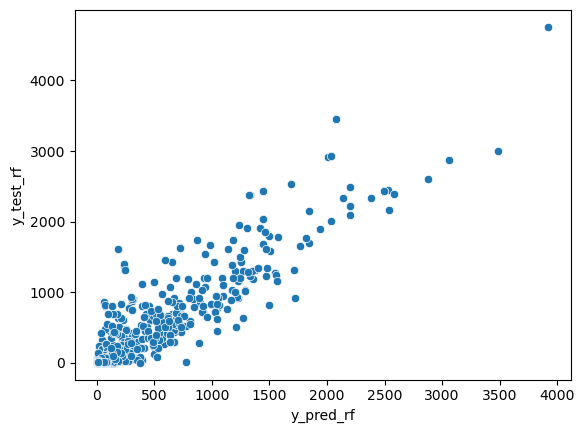

In [169]:
sns.scatterplot(data = E_df , x = 'y_pred_rf' , y = 'y_test_rf')

<Axes: xlabel='y_pred_dt', ylabel='y_test_rf'>

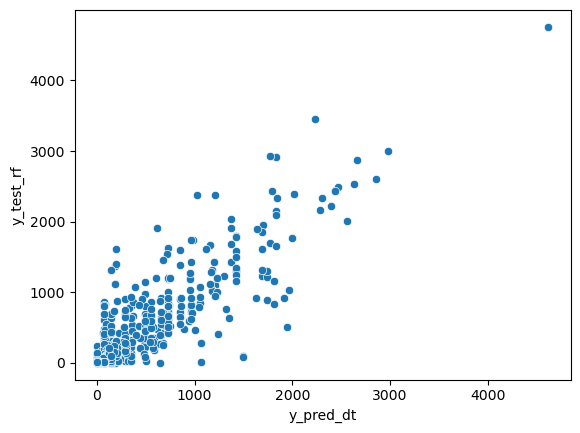

In [170]:
sns.scatterplot(data = E_df , x = 'y_pred_dt' , y = 'y_test_rf')

<Axes: xlabel='y_pred_gb', ylabel='y_test_rf'>

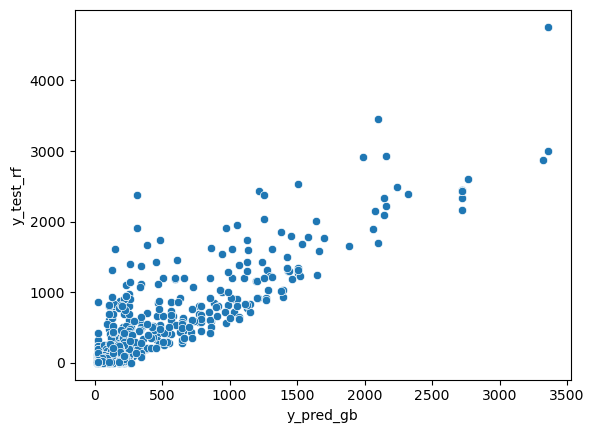

In [171]:
sns.scatterplot(data = E_df , x = 'y_pred_gb' , y = 'y_test_rf')

# Using Stacking Regressor :

In [178]:
stacking_rgr = StackingRegressor(
   estimators = [
       ('dt', DecisionTreeRegressor(max_depth = 10)),
       ('rf', RandomForestRegressor(n_estimators = 100,max_depth = 10)),
       ('gb', GradientBoostingRegressor(n_estimators = 100,max_depth = 1))
   ],
   final_estimator = LinearRegression(),
   cv = 5
)

In [179]:
X_train_dummy = preprocessor.fit_transform(X_train_rf)
X_test_dummy = preprocessor.transform(X_test_rf)
stacking_rgr.fit(X_train_dummy , y_train_rf)
y_pred_st = stacking_rgr.predict(X_test_dummy)
print(r2_score(y_test_rf , y_pred_st))

0.8633184910533394


# So , I will go for stacking regressor here :

# Making Prediction Model :

In [182]:
def capacity_prediction(	primary_fuel,	other_fuel1,	other_fuel2,	other_fuel3,	geolocation_source,	generation_gwh_2013,	generation_gwh_2014,	generation_gwh_2015,	generation_gwh_2016,	generation_gwh_2017,	generation_gwh_2018):
    features = np.array([[	primary_fuel,	other_fuel1,	other_fuel2,	other_fuel3,	geolocation_source,	generation_gwh_2013,	generation_gwh_2014,	generation_gwh_2015,	generation_gwh_2016,	generation_gwh_2017,	generation_gwh_2018]])
    transformed_features = preprocessor.transform(features)
    predict_value = stacking_rgr.predict(transformed_features).reshape(1,-1)
    return predict_value[0]

In [183]:
primary_fuel = 291
other_fuel1 = 0
other_fuel2 = 0
other_fuel3 = 0
geolocation_source = 370
generation_gwh_2013 = 2.41
generation_gwh_2014 = 617.78
generation_gwh_2015 = 843.74
generation_gwh_2016 = 886.00
generation_gwh_2017 = 663.77
generation_gwh_2018 = 626.23


results = capacity_prediction(	primary_fuel,	other_fuel1,	other_fuel2,	other_fuel3,	geolocation_source,	generation_gwh_2013,	generation_gwh_2014,	generation_gwh_2015,	generation_gwh_2016,	generation_gwh_2017,	generation_gwh_2018)
results

array([258.76796386])